# 量价分析 —— 寻找“聪明钱” (OBV 指标)

In [1]:
import akshare as ak
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['font.sans-serif']=['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

/Users/user/Documents/Fund_Auto_Bot/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
print('🌊 正在追踪国泰证券的资金流向 (OBV)...')
df = ak.fund_etf_hist_em(symbol='512880',period='daily',start_date='20240101',end_date='20251231')
df['日期'] = pd.to_datetime(df['日期'])
df = df.set_index('日期').sort_index()
df['change'] = df['收盘'].diff()
df['direction'] = np.where(df['change']>0,1,np.where(df['change']<0,-1,0))
df['vol_adj'] = df['direction']*df['成交量']
df['OBV']=df['vol_adj'].cumsum()
recent = df.tail(120)


🌊 正在追踪国泰证券的资金流向 (OBV)...


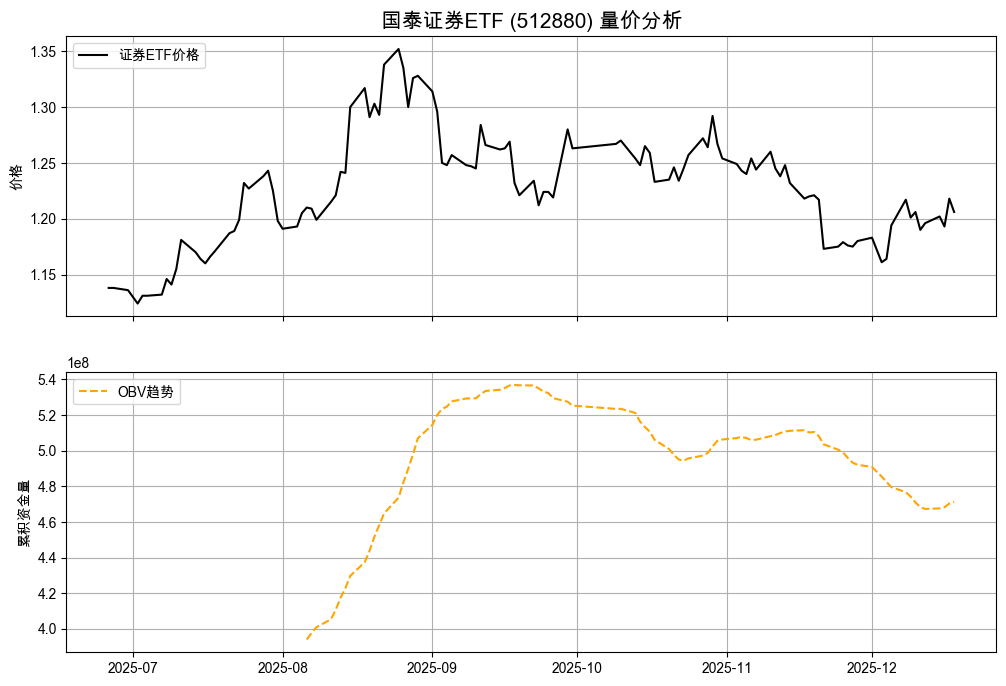

In [6]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(12,8),sharex=True)
ax1.plot(recent.index,recent['收盘'],label='证券ETF价格',color='black')
ax1.set_title('国泰证券ETF (512880) 量价分析',fontsize=15)
ax1.set_ylabel('价格')
ax1.legend(loc='upper left')
ax1.grid(True)
ax2.plot(recent.index,recent['OBV'].rolling(30).mean(),label='OBV趋势',color='orange',linestyle='--')
ax2.set_ylabel('累积资金量')
ax2.legend(loc='upper left')
ax2.grid(True)
plt.show()

In [5]:
recent_20 = df.tail(20)
price_trend = '平'
if recent_20['收盘'].iloc[-1]>recent_20['收盘'].iloc[0]:price_trend = '涨'
elif recent_20['收盘'].iloc[-1]<recent_20['收盘'].iloc[0]:price_trend = '跌'
obv_trend = '平'
if recent_20['OBV'].iloc[-1] > recent_20['OBV'].iloc[0]: obv_trend = "涨"
elif recent_20['OBV'].iloc[-1] < recent_20['OBV'].iloc[0]: obv_trend = "跌"
print(f'📊 近20天趋势诊断：')
print(f'价格走势:{price_trend}')
print(f'资金走势: {obv_trend}')
if price_trend=='涨' and obv_trend == '跌':
    print('🚨 警报：【顶背离】！价格涨但钱跑了，诱多！(准备卖出)')
elif price_trend == "跌" and obv_trend == "涨":
    print("💎 机会：【底背离】！价格跌但钱在进，挖坑！(准备买入)")
else:
    print("☁️ 正常：量价配合一致，跟随趋势。")

📊 近20天趋势诊断：
价格走势:涨
资金走势: 涨
☁️ 正常：量价配合一致，跟随趋势。
